In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [7]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
bos.columns = boston['feature_names']

In [10]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
y = boston['target']

In [12]:
df = bos.copy()

In [13]:
df['PRICE'] =boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [17]:
df.shape

(506, 14)

In [18]:
x = df.iloc[:,:-1]
y = df['PRICE']

In [19]:
y.shape,x.shape

((506,), (506, 13))

In [20]:
import seaborn as sns

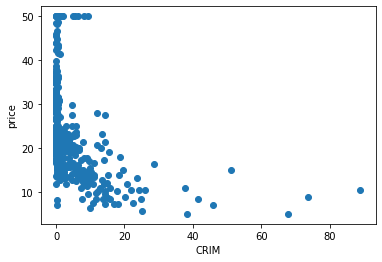

In [21]:
plt.scatter(x=df['CRIM'],y=y)
plt.xlabel('CRIM')
plt.ylabel('price')
plt.show()

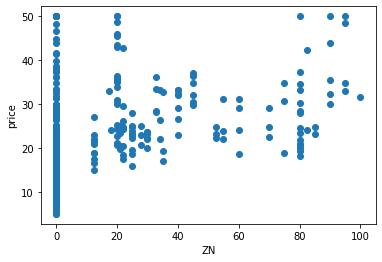

In [22]:
plt.scatter(x=df['ZN'],y=y)
plt.xlabel('ZN')
plt.ylabel('price')
plt.show()

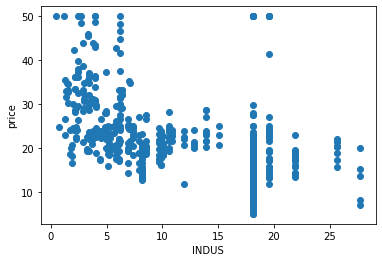

In [23]:
plt.scatter(x=df['INDUS'],y=y)
plt.xlabel('INDUS')
plt.ylabel('price')
plt.show()

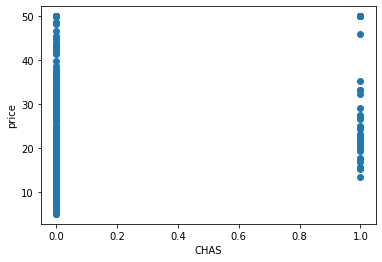

In [24]:
plt.scatter(x=df['CHAS'],y=y)
plt.xlabel('CHAS')
plt.ylabel('price')
plt.show()

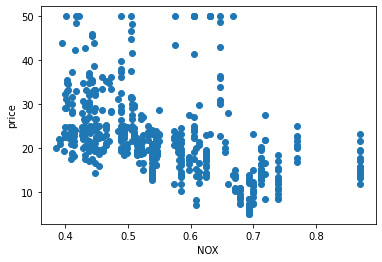

In [25]:
plt.scatter(x=df['NOX'],y=y)
plt.xlabel('NOX')
plt.ylabel('price')
plt.show()

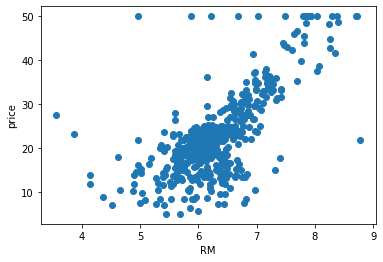

In [26]:
# average number of rooms per dwelling => INCREASE ROOM INCREASE PRICE
plt.scatter(x=df['RM'],y=y)
plt.xlabel('RM')
plt.ylabel('price')
plt.show()

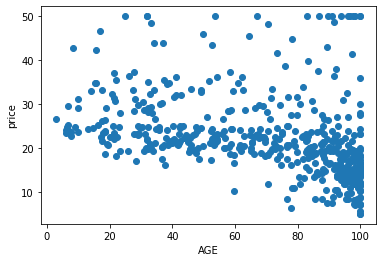

In [27]:
plt.scatter(x=df['AGE'],y=y)
plt.xlabel('AGE')
plt.ylabel('price')
plt.show()

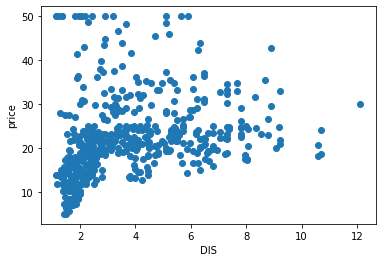

In [28]:
# weighted distances to five Boston employment centres : DISTANCE LESS PRICE MORE
plt.scatter(x=df['DIS'],y=y)
plt.xlabel('DIS')
plt.ylabel('price')
plt.show()

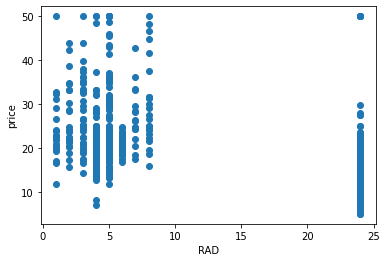

In [29]:
#accessibility to radial highways : MORE ACCESSABLE MORE PRICE
plt.scatter(x=df['RAD'],y=y)
plt.xlabel('RAD')
plt.ylabel('price')
plt.show()

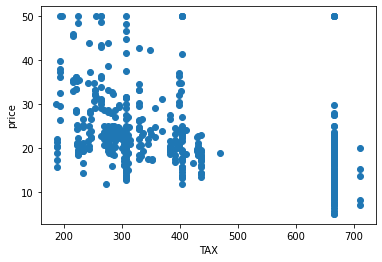

In [30]:
# MAXIUM TAX 450 PRICE IS INCREASE
plt.scatter(x=df['TAX'],y=y)
plt.xlabel('TAX')
plt.ylabel('price')
plt.show()

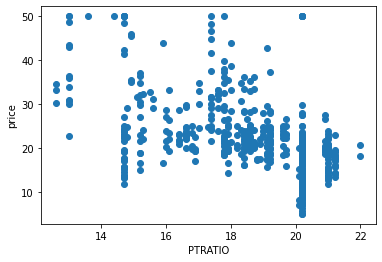

In [31]:
# teacher ratio by town => NOT SO MUCH EFFECT WITH PRICE
plt.scatter(x=df['PTRATIO'],y=y)
plt.xlabel('PTRATIO')
plt.ylabel('price')
plt.show()

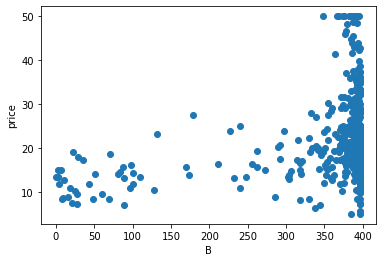

In [32]:
# proportion of blacks by town : B MAXIMUM PRICE INCREASE
plt.scatter(x=df['B'],y=y)
plt.xlabel('B')
plt.ylabel('price')
plt.show()

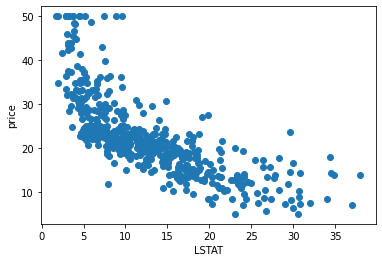

In [33]:
#lower status of the population => STATUS INCREASE PRICE INCREASE
plt.scatter(x=df['LSTAT'],y=y)
plt.xlabel('LSTAT')
plt.ylabel('price')
plt.show()

In [34]:
# test train split for not overfitted or underfitted
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

In [35]:
x_train.shape,x_test.shape

((337, 13), (169, 13))

In [36]:
x_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.194226,0.419379,-0.085173,0.421379,-0.262928,0.362260,-0.383229,0.636346,0.605314,0.286644,-0.424608,0.473890
ZN,-0.194226,1.000000,-0.524591,-0.006035,-0.493493,0.340674,-0.534527,0.634568,-0.295469,-0.311390,-0.420134,0.167536,-0.415842
INDUS,0.419379,-0.524591,1.000000,0.008549,0.761650,-0.383633,0.642060,-0.696240,0.603071,0.711162,0.391409,-0.345374,0.627559
CHAS,-0.085173,-0.006035,0.008549,1.000000,0.014112,0.138472,0.048146,-0.044789,-0.077491,-0.105291,-0.192351,0.071320,-0.065259
NOX,0.421379,-0.493493,0.761650,0.014112,1.000000,-0.310977,0.734828,-0.769958,0.605063,0.671722,0.177079,-0.348599,0.600385
RM,-0.262928,0.340674,-0.383633,0.138472,-0.310977,1.000000,-0.227473,0.234905,-0.219550,-0.280443,-0.354266,0.126491,-0.591848
AGE,0.362260,-0.534527,0.642060,0.048146,0.734828,-0.227473,1.000000,-0.730440,0.477142,0.524911,0.285776,-0.252996,0.606743
DIS,-0.383229,0.634568,-0.696240,-0.044789,-0.769958,0.234905,-0.730440,1.000000,-0.495186,-0.539359,-0.238254,0.274242,-0.504091
RAD,0.636346,-0.295469,0.603071,-0.077491,0.605063,-0.219550,0.477142,-0.495186,1.000000,0.930910,0.442645,-0.467102,0.512795
TAX,0.605314,-0.311390,0.711162,-0.105291,0.671722,-0.280443,0.524911,-0.539359,0.930910,1.000000,0.455550,-0.460556,0.559135


<AxesSubplot:>

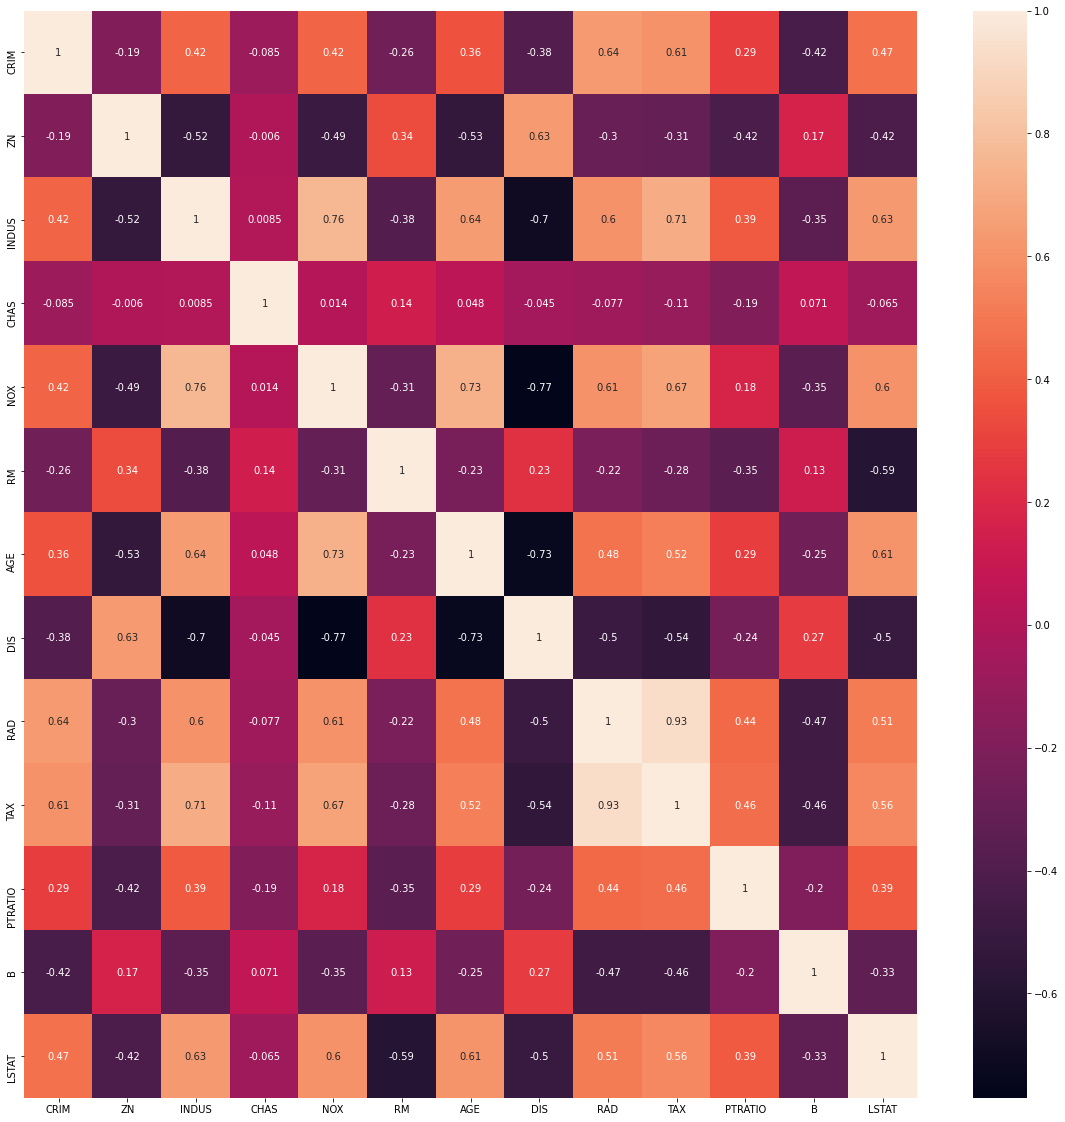

In [37]:
corr=x_train.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(x_train[top_features].corr(),annot=True)

In [38]:
corr.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [39]:
#https://machinelearningmastery.com/feature-selection-machine-learning-python/
#https://scikit-learn.org/stable/modules/feature_selection.html
# feature_selection with VarianceThreshold
# https://setosa.io/#/
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.07)

In [40]:
selector.fit(x_train)
selector.get_support()

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True])

In [41]:
con_column = [col for col in x.columns if col not in x.columns[selector.get_support()]]
con_column

['CHAS', 'NOX']

In [42]:
from sklearn.feature_selection import mutual_info_regression,f_regression,SelectKBest

In [43]:
mutual_info = mutual_info_regression(x_train,y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info

CRIM       0.398562
ZN         0.160138
INDUS      0.539316
CHAS       0.029087
NOX        0.461451
RM         0.508374
AGE        0.373070
DIS        0.282524
RAD        0.193974
TAX        0.332004
PTRATIO    0.464937
B          0.167124
LSTAT      0.756321
dtype: float64

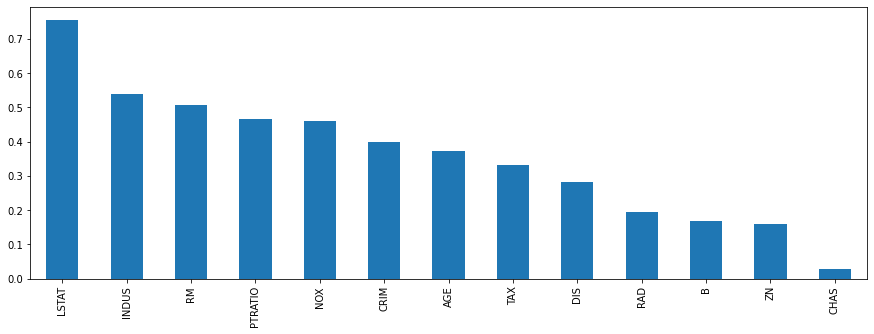

In [44]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.show()

In [45]:
from sklearn.feature_selection import SelectPercentile
percentile = SelectPercentile(mutual_info_regression, percentile=20)
percentile.fit(x_train, y_train)
percentile.get_support()

array([False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True])

In [46]:
get_valuable_clm = x_train.columns[percentile.get_support()]
get_valuable_clm

Index(['INDUS', 'RM', 'LSTAT'], dtype='object')

In [47]:
f_tst = f_regression(x_train,y_train)
#f_tst = pd.Series(f_tst)
# f_tst.index = x_train.columns
# f_tst
f_tst

(array([ 79.36295841,  68.99954409, 131.8779538 ,  10.57904313,
         95.42516596, 283.84054767,  71.57079223,  35.69849588,
         90.73921022, 129.80029878, 170.09749833,  44.41453487,
        445.56022108]),
 array([3.36043247e-17, 2.47185025e-15, 5.80544991e-26, 1.26019001e-03,
        5.35730165e-20, 1.45345073e-46, 8.41690701e-16, 5.88766654e-09,
        3.41646399e-19, 1.23227408e-25, 1.00597272e-31, 1.09414004e-10,
        1.68581769e-63]))

In [48]:
k_best = SelectKBest(mutual_info_regression,k=6)
k_best.fit(x_train, y_train)
k_best.get_support()

array([ True, False,  True, False,  True,  True, False, False, False,
       False,  True, False,  True])

In [49]:
get_kbest_clm = x_train.columns[k_best.get_support()]
get_kbest_clm

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT'], dtype='object')

In [50]:
def corelate(dataset,threshold):
    col_cor = set()
    corr_matrix =dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_cor.add(colname)
    return col_cor

In [51]:
corr_features = corelate(x_train,0.7)
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [52]:
x_train.drop(corr_features,axis=1).head()

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
303,0.10000,34.0,6.09,0.0,6.982,7.0,16.1,390.43,4.86
182,0.09103,0.0,2.46,0.0,7.155,3.0,17.8,394.12,4.82
51,0.04337,21.0,5.64,0.0,6.115,4.0,16.8,393.97,9.43
280,0.03578,20.0,3.33,0.0,7.820,5.0,14.9,387.31,3.76
242,0.10290,30.0,4.93,0.0,6.358,6.0,16.6,372.75,11.22


In [53]:
#https://machinelearningmastery.com/linear-regression-for-machine-learning/
from sklearn.linear_model import LinearRegression

In [54]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
reg.score(x_train, y_train)

0.7715592575309357

In [56]:
reg.score(x_test, y_test)

0.6624904259156632

In [57]:
print(reg.intercept_)
print(reg.coef_)

44.08607984222443
[-8.10557149e-02  3.82390591e-02  5.81973668e-02  9.84511926e-01
 -1.82870980e+01  3.27237101e+00  5.82545771e-03 -1.26560811e+00
  2.33537335e-01 -1.15595510e-02 -1.21589134e+00  7.80471233e-03
 -5.18724421e-01]


In [58]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='PRICE ~ CRIM+ZN+INDUS+CHAS+RM+RAD+PTRATIO+B+LSTAT', data=df).fit()
lm.conf_int()
lm.summary()
# https://www.youtube.com/watch?v=1mWFhwgVvjk

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     128.8
Date:                Wed, 27 Oct 2021   Prob (F-statistic):          9.89e-124
Time:                        05:58:06   Log-Likelihood:                -1535.4
No. Observations:                 506   AIC:                             3091.
Df Residuals:                     496   BIC:                             3133.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8214      4.353      3.175      0.002       5.268      22.375
CRIM          -0.0741      0.035     -2.122      0.034      -0.143      -0.005
ZN            -0.0050      0.012     -0.417      0.677      -0.028       0.019
INDUS         -0.0240      0.050     -0.481      0.631      -0.122       0.074
CHAS           3.1420      0.913      3.443      0.001       1.349       4.935
RM             4.5356      0.427     10.627      0.000       3.697       5.374
RAD            0.0962      0.041      2.343      0.020       0.016       0.177
PTRATIO       -0.9519      0.129     -7.404      0.000      -1.204      -0.699
B              0.0107      0.003      3.749      0.000       0.005       0.016
LSTAT         -0.5214      0.050    -10.497      0.000      -0.619      -0.424
==============================================================================
Omnibus:                      192.601   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.622   Prob(JB):                    2.36e-204
Kurtosis:                       8.827   Cond. No.                     7.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [62]:
y_pred = reg.predict(x_test)

In [70]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (337, 13)
x_test shape: (169, 13)
y_train shape: (337,)
y_test shape: (169,)


In [66]:
print(y_pred.shape)

(169,)


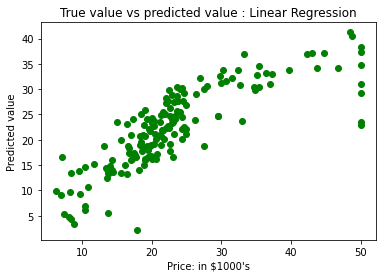

In [73]:
# Plotting Scatter graph to show the prediction
# results - 'ytrue' value vs 'y_pred' value
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [75]:
# Results of Linear Regression.
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error : ", mse)

Mean Square Error :  32.82864883236148
